In [179]:
import numpy as np 
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
image = Image.open('random.jpeg')

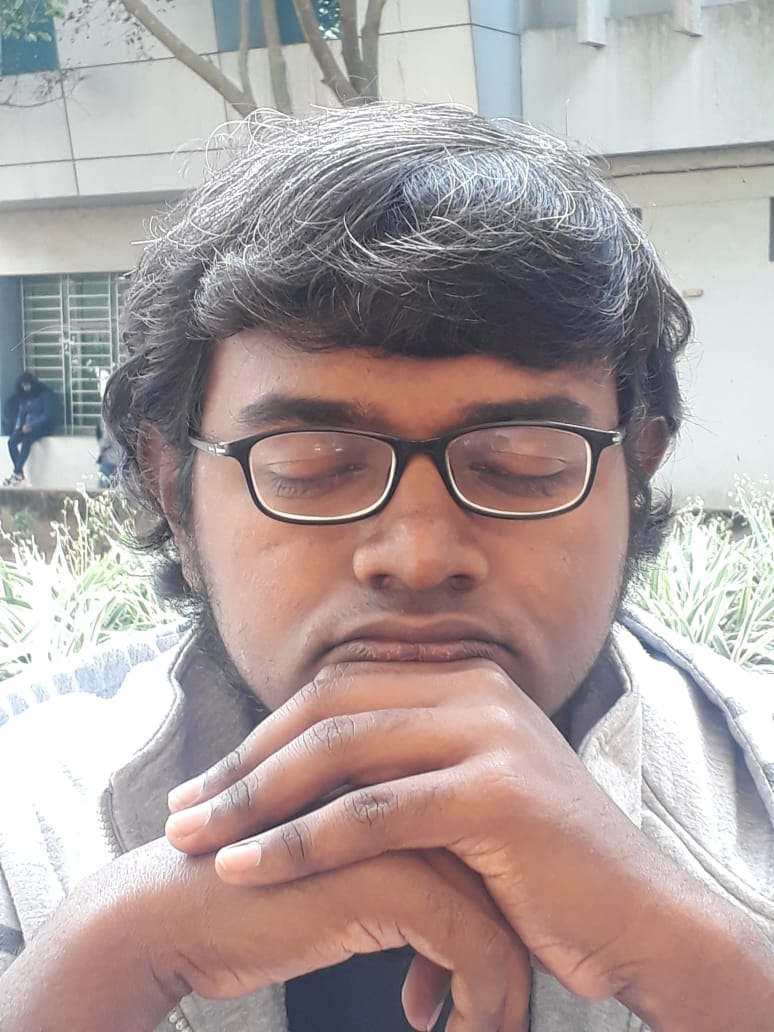

In [209]:
image

In [210]:
image.size

(774, 1032)

In [211]:
data = np.array(image)

In [212]:
data.shape

(1032, 774, 3)

In [213]:
data.dtype

dtype('uint8')

In [214]:
r = data[:,:,0]
g = data[:,:,1]
b = data[:,:,2]

In [215]:
pca = PCA()

In [216]:
r_pca = pca.fit_transform(r)
g_pca = pca.fit_transform(g)
b_pca = pca.fit_transform(b)

In [217]:
from scipy.linalg import eigh

In [219]:
rcov = np.matmul(r,r.T)
gcov = np.matmul(g,g.T)
bcov = np.matmul(b,b.T)

In [220]:
values_r,vectors_r = eigh(rcov)
values_g,vectors_g = eigh(gcov)
values_b,vectors_b = eigh(bcov)

In [221]:
indx_r = np.argsort(np.absolute(values_r))
indx_g = np.argsort(np.absolute(values_g))
indx_b = np.argsort(np.absolute(values_b))

In [222]:
vectors_r = vectors_r[indx_r][::-1]
vectors_g = vectors_g[indx_g][::-1]
vectors_b = vectors_b[indx_b][::-1]

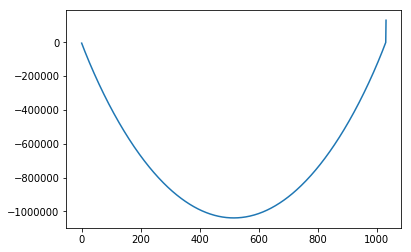

In [289]:
plt.plot(np.cumsum(values_g))

In [223]:
new_r = np.dot(data[:,:,0].T,vectors_r)
new_g = np.dot(data[:,:,1].T,vectors_g)
new_b = np.dot(data[:,:,2].T,vectors_b)

In [287]:
reconst_r = np.dot(vectors_r[:,:],new_r[:,:1000].T)
reconst_g = np.dot(vectors_g[:,:],new_g[:,:1000].T)
reconst_b = np.dot(vectors_b[:,:],new_b[:,:1000].T)

ValueError: shapes (1032,1032) and (1000,774) not aligned: 1032 (dim 1) != 1000 (dim 0)

In [285]:
z = np.dstack((reconst_r,reconst_g,reconst_b))

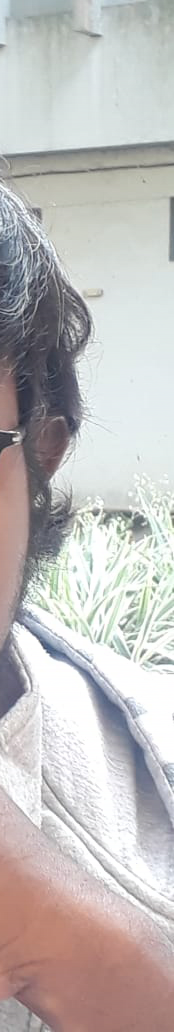

In [286]:
Image.fromarray(z.astype('uint8'), mode=None)

In [ ]:
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

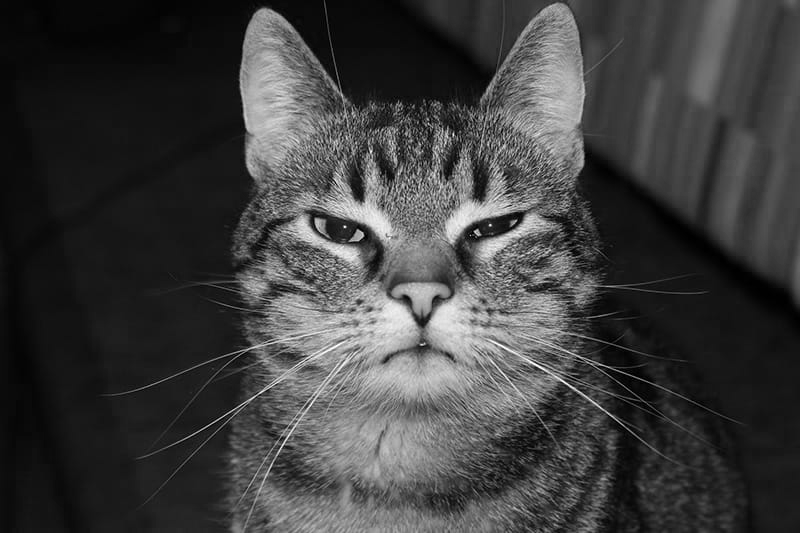

In [33]:
Image.fromarray(data[:,:,0])

In [38]:
x = image[:,:,0].resize((18,18))

TypeError: 'JpegImageFile' object is not subscriptable

In [37]:
x

In [42]:
print(np.array(x)[:,:,0])

[[  6   7   7   4   7  11  10  10   8  22  41  49 163  47  63  72  96  56]
 [  9   5   6   8  11 138  98  17  11  10  24  44 173  62  65  71  69  56]
 [ 11  12  13  13  15 137 154  20  17  14  10  95 180  52  60  83  73  60]
 [ 15  17  18  17  17 181 165  50  34  25  24 106 195  51  74  74  69  66]
 [ 10  18  21  20  16  27 165  92  29  37  55  94 133  55  84  70  72  75]
 [ 11  21  21  19  23  34 155  56  64  13 175  42 101   9  79  63  82  79]
 [ 13  23  18  23  24  23  97  82 121  94 128  59  65  18  17  70  89  76]
 [ 14  18  21  25  23  89  93  34 231 141 215 134  71  21  19  24  78  65]
 [ 11  21  22  24  23 119 134 224  24 135  46 121  82  37  20  11  43  62]
 [ 13  18  25  24  31 148 150 105 101  83 139  45  61  76  18  19   7  28]
 [ 11  18  25  25  28  48 147 180 176 108 181 155 112  15  21  21  20   6]
 [  7  19  31  28  29  22 123 139 202  72 214 171  64  83  21  25  21  15]
 [  4  22  28  29  32  20 212 208 185 155 180 100 149 128  20  19  23  22]
 [  8  22  30  28  29  52

In [378]:
reconst_r50 = np.dot(vectors_r[:,-1900:],new_r[:,-1900:].T)
reconst_g50 = np.dot(vectors_g[:,-1900:],new_g[:,-1900:].T)
reconst_b50 = np.dot(vectors_b[:,-1900:],new_b[:,-1900:].T)

In [379]:
new_r.shape

(2896, 1944)

In [380]:
vectors_r.shape


(1944, 1944)

In [381]:
z50 = np.dstack((reconst_r50,reconst_g50,reconst_b50))

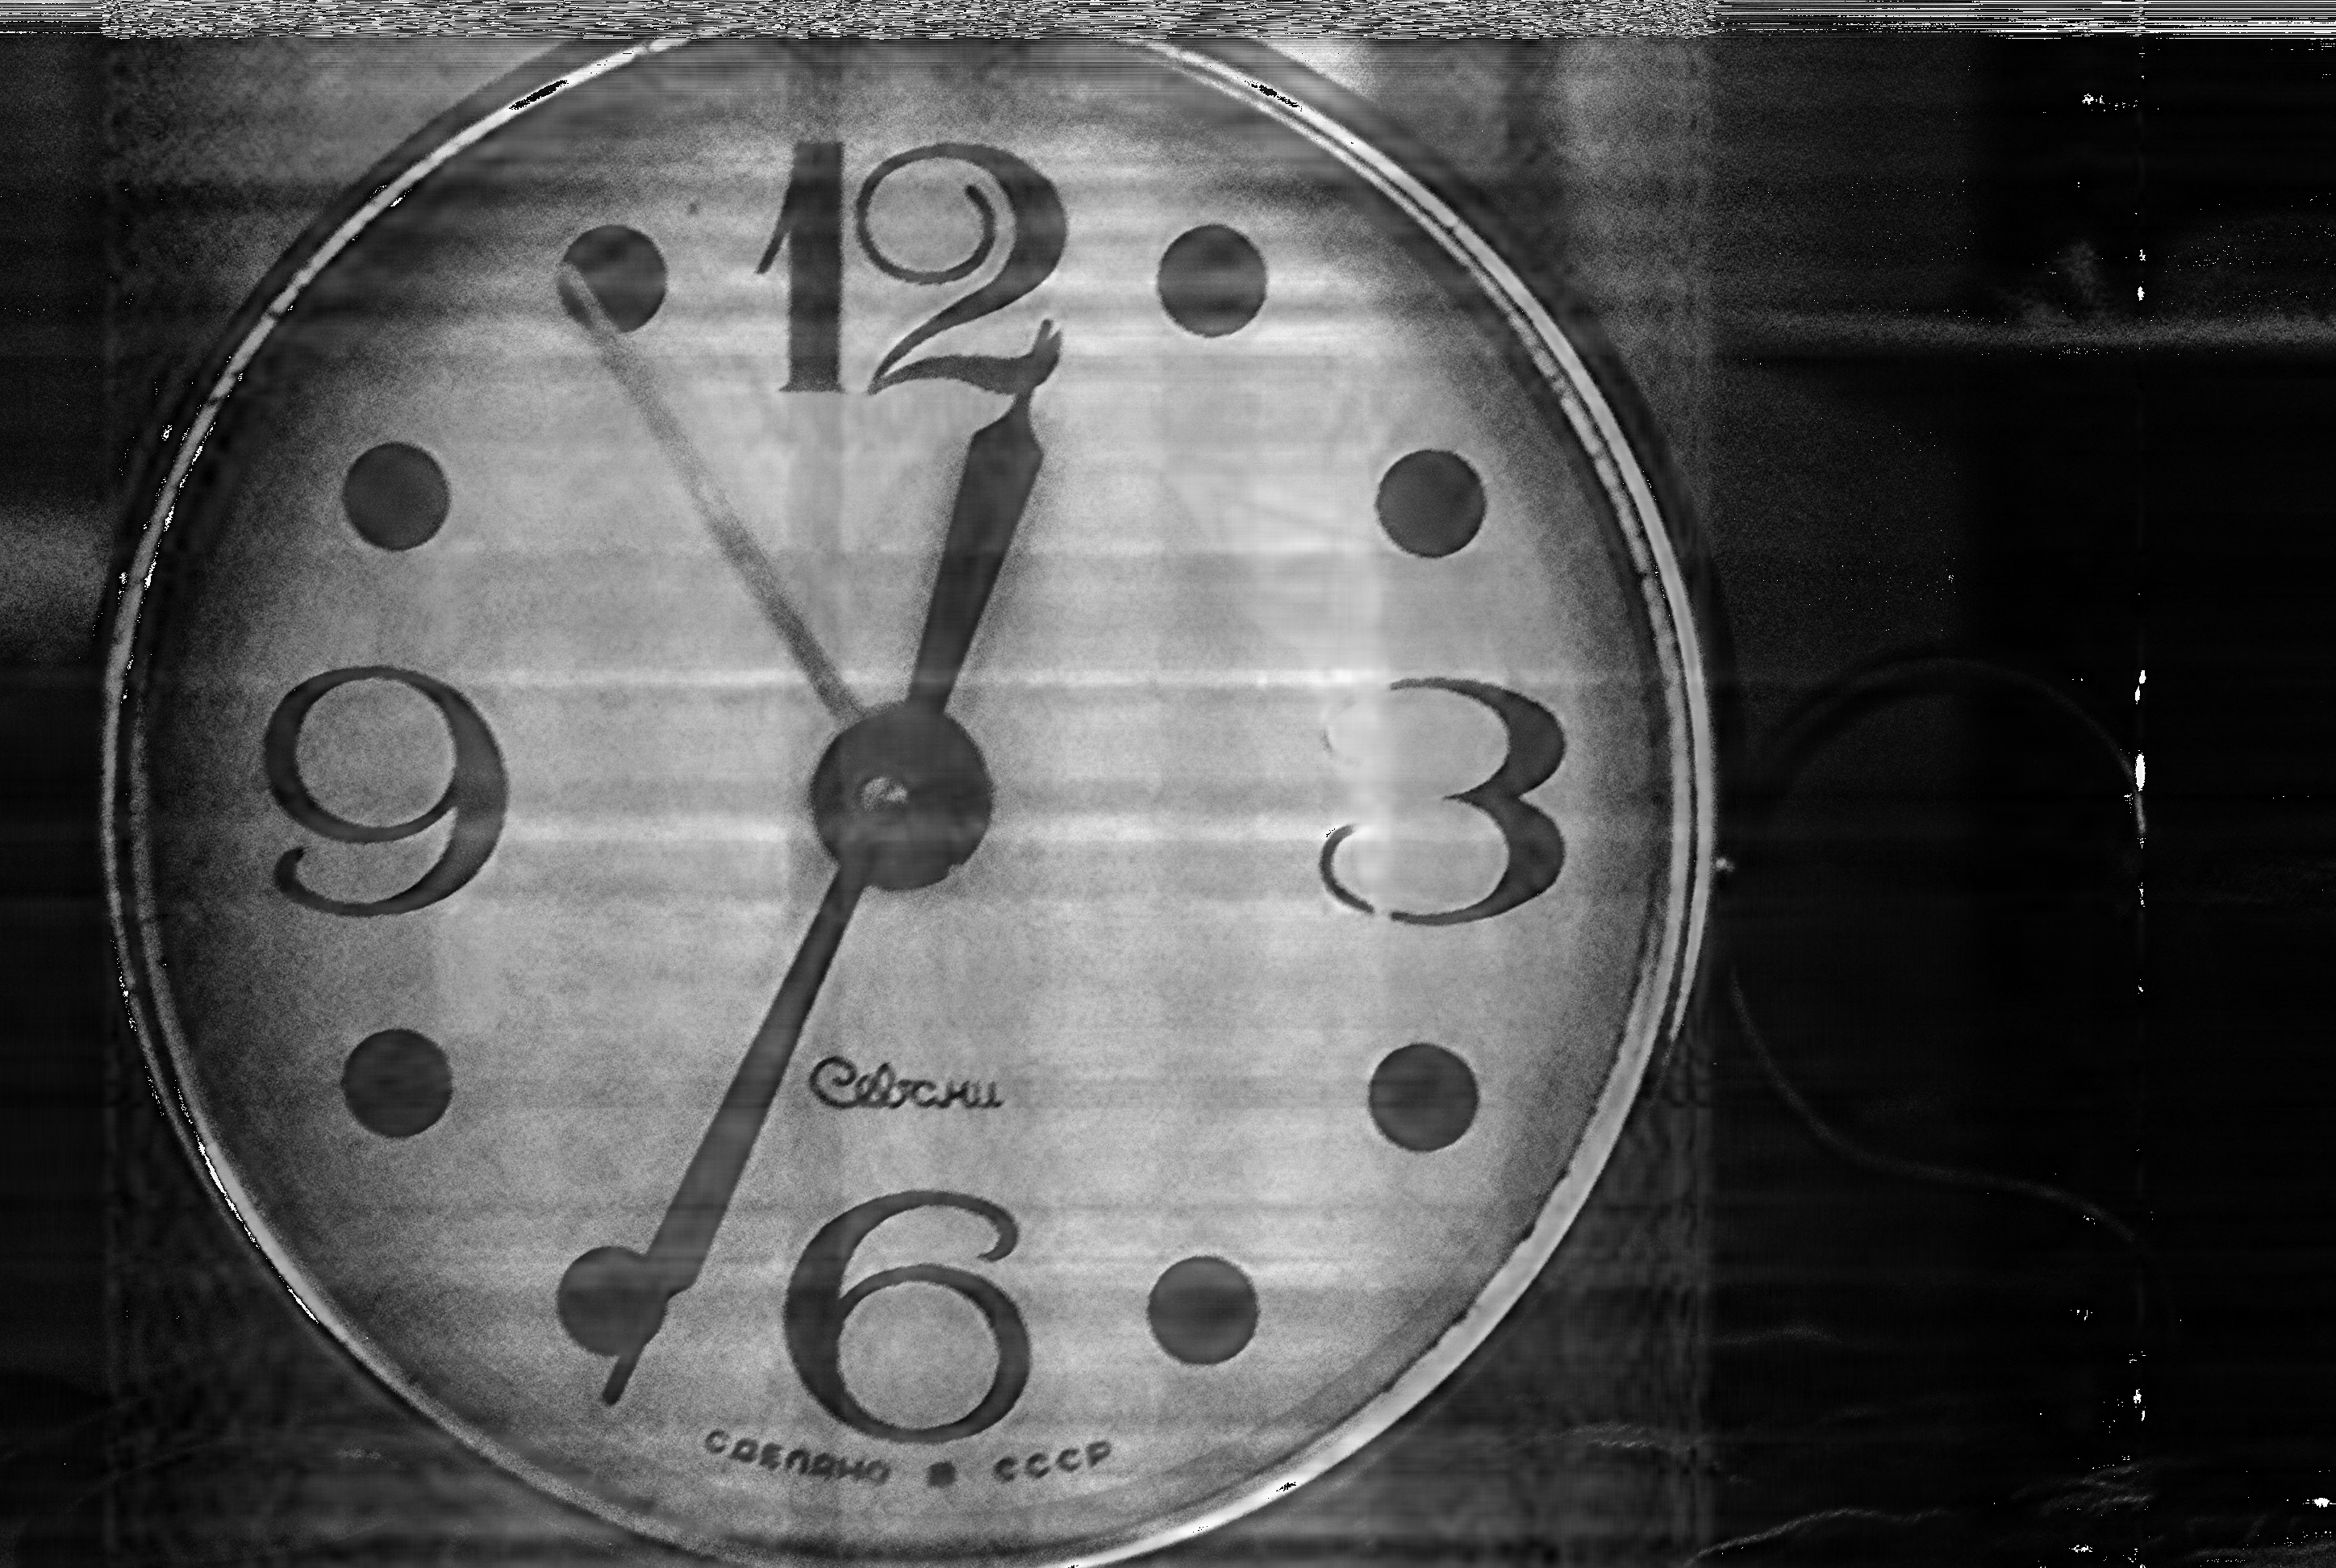

In [382]:
Image.fromarray(z50.astype('uint8'), mode=None)